In [127]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("/Users/karthiv/Documents/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [128]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [129]:
label_encoder = preprocessing.LabelEncoder() 

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df1=df.drop(['CustomerID'],axis=1)

In [130]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [186]:
Xd = df1.values
Xd

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

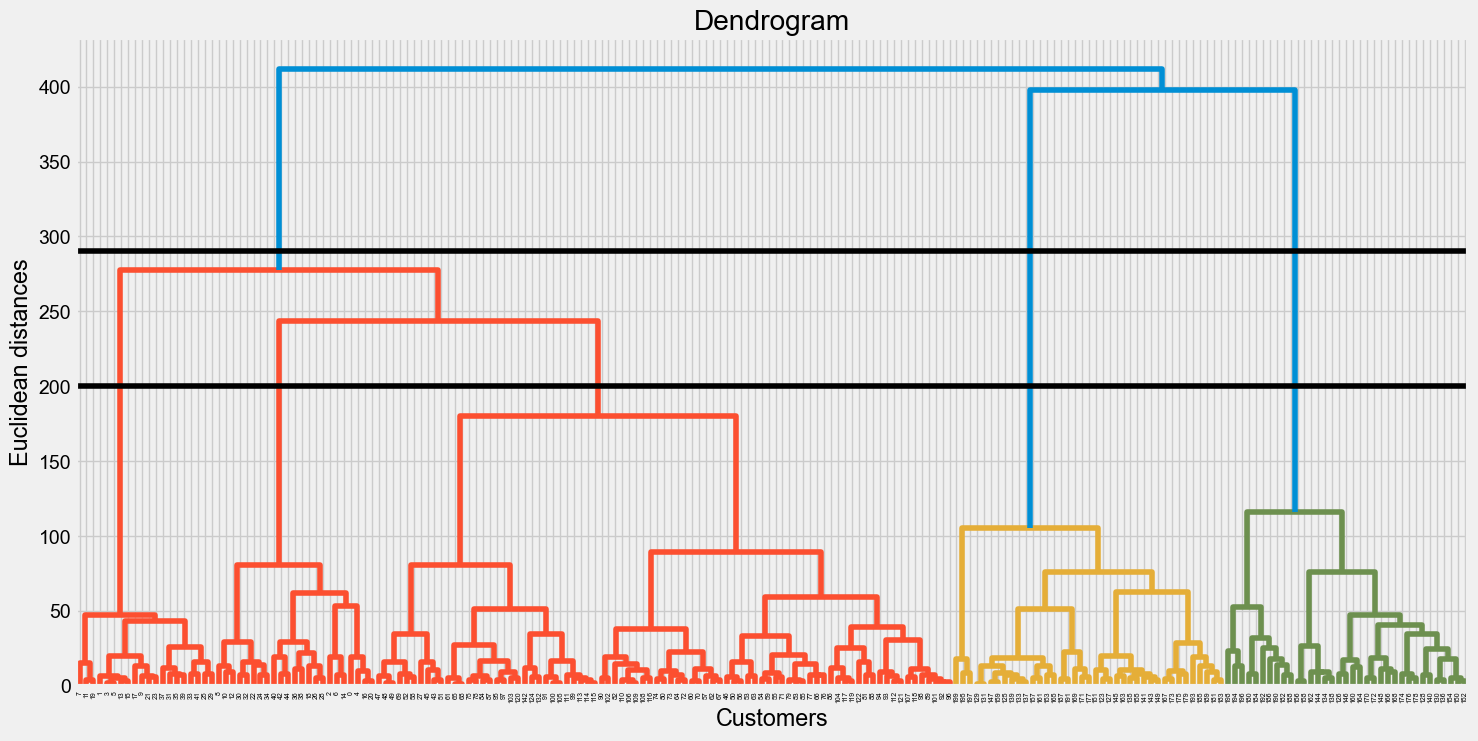

<Figure size 640x480 with 0 Axes>

In [187]:
# Plot the Dendrogram to choose the number off clusters
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(Xd, method  = "ward",metric ="euclidean"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.axhline(y=290, c='k') # for 3 clusters
plt.axhline(y=200 , c='k') # for 5 clusters
plt.show()
plt.savefig('Dendrogram.png')

In [161]:
# We have choosen ward and euclidean distance for dendrogram because they are most commanly used method and metric,
# Which yields good results as ward links points based on the errors and Euclidean works well in lower dimensions.

In [169]:
# Model with 3 clusters
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

y_hc = hc.fit_predict(Xd)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [170]:
cluster_no = pd.DataFrame(y_hc,columns=['cluster_no'])
Final_table = pd.concat([df,cluster_no],axis=1)
Final_table.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_no
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [171]:
# Number off datapoints in each cluster
Final_table['cluster_no'].value_counts()

cluster_no
0    126
2     39
1     35
Name: count, dtype: int64

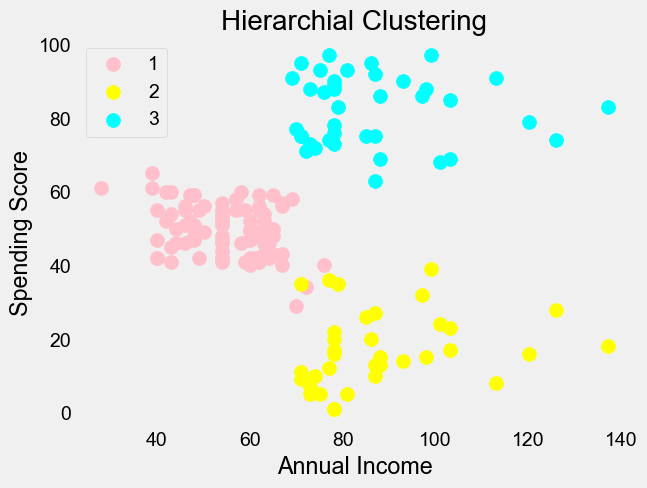

<Figure size 640x480 with 0 Axes>

In [189]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = '1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = '2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = '3')


plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()
plt.savefig('clusterplot_3.png')

In [173]:
from sklearn.metrics import silhouette_samples , silhouette_score

print(f'Silhouette Score(n=3): {silhouette_score(Xd, y_hc)}')

Silhouette Score(n=3): 0.3812859576468096


In [190]:
# Model with 5 clusters
hc1 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

y_hc1= hc1.fit_predict(Xd)
y_hc1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [177]:
cluster_no = pd.DataFrame(y_hc1,columns=['cluster_no'])
Final_table = pd.concat([df,cluster_no],axis=1)
Final_table.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_no
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [178]:
Final_table['cluster_no'].value_counts()

cluster_no
0    83
2    39
1    35
4    23
3    20
Name: count, dtype: int64

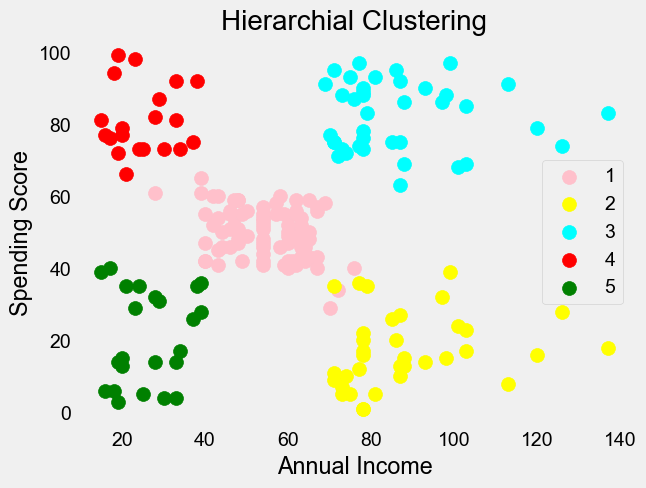

<Figure size 640x480 with 0 Axes>

In [191]:
plt.scatter(x[y_hc1 == 0, 0], x[y_hc1 == 0, 1], s = 100, c = 'pink', label = '1')
plt.scatter(x[y_hc1 == 1, 0], x[y_hc1 == 1, 1], s = 100, c = 'yellow', label = '2')
plt.scatter(x[y_hc1 == 2, 0], x[y_hc1 == 2, 1], s = 100, c = 'cyan', label = '3')
plt.scatter(x[y_hc1 == 3, 0], x[y_hc1 == 3, 1], s = 100, c = 'red', label = '4')
plt.scatter(x[y_hc1 == 4, 0], x[y_hc1 == 4, 1], s = 100, c = 'green', label = '5')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()
plt.savefig('Clusterplt_5.png')

In [181]:
from sklearn.metrics import silhouette_samples , silhouette_score

print(f'Silhouette Score(n=3): {silhouette_score(Xd, y_hc1)}')

Silhouette Score(n=3): 0.43997527212476695


In [182]:
# Drill down the denotogram 
z = sch.linkage(Xd, method  = "ward")
z[0:80]

array([[ 65.        ,  68.        ,   1.        ,   2.        ],
       [129.        , 131.        ,   1.        ,   2.        ],
       [  3.        ,   5.        ,   1.73205081,   2.        ],
       [ 48.        ,  49.        ,   2.        ,   2.        ],
       [106.        , 109.        ,   2.23606798,   2.        ],
       [100.        , 105.        ,   2.23606798,   2.        ],
       [114.        , 115.        ,   2.23606798,   2.        ],
       [ 92.        ,  96.        ,   2.44948974,   2.        ],
       [147.        , 159.        ,   2.44948974,   2.        ],
       [133.        , 137.        ,   2.64575131,   2.        ],
       [101.        , 207.        ,   2.94392029,   3.        ],
       [ 13.        ,  15.        ,   3.        ,   2.        ],
       [ 83.        ,  85.        ,   3.        ,   2.        ],
       [117.        , 119.        ,   3.        ,   2.        ],
       [156.        , 158.        ,   3.        ,   2.        ],
       [ 16.        ,  20

In [183]:
# Dendrogram data 
dendrogram 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342

In [71]:
type(dendrogram)

dict

In [73]:
x = dendrogram.keys()
print(x)

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])


In [75]:
pd.DataFrame(list(dendrogram.items()), columns=['Key', 'Values'])

,Key,Values
0,icoord,"[[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20..."
1,dcoord,"[[0.0, 13.711309200802088, 13.711309200802088,..."
2,ivl,"[198, 194, 196, 174, 176, 178, 182, 186, 180, ..."
3,leaves,"[198, 194, 196, 174, 176, 178, 182, 186, 180, ..."
4,color_list,"[C1, C1, C1, C1, C1, C1, C1, C1, C1, C1, C1, C..."
5,leaves_color_list,"[C1, C1, C1, C1, C1, C1, C1, C1, C1, C1, C1, C..."


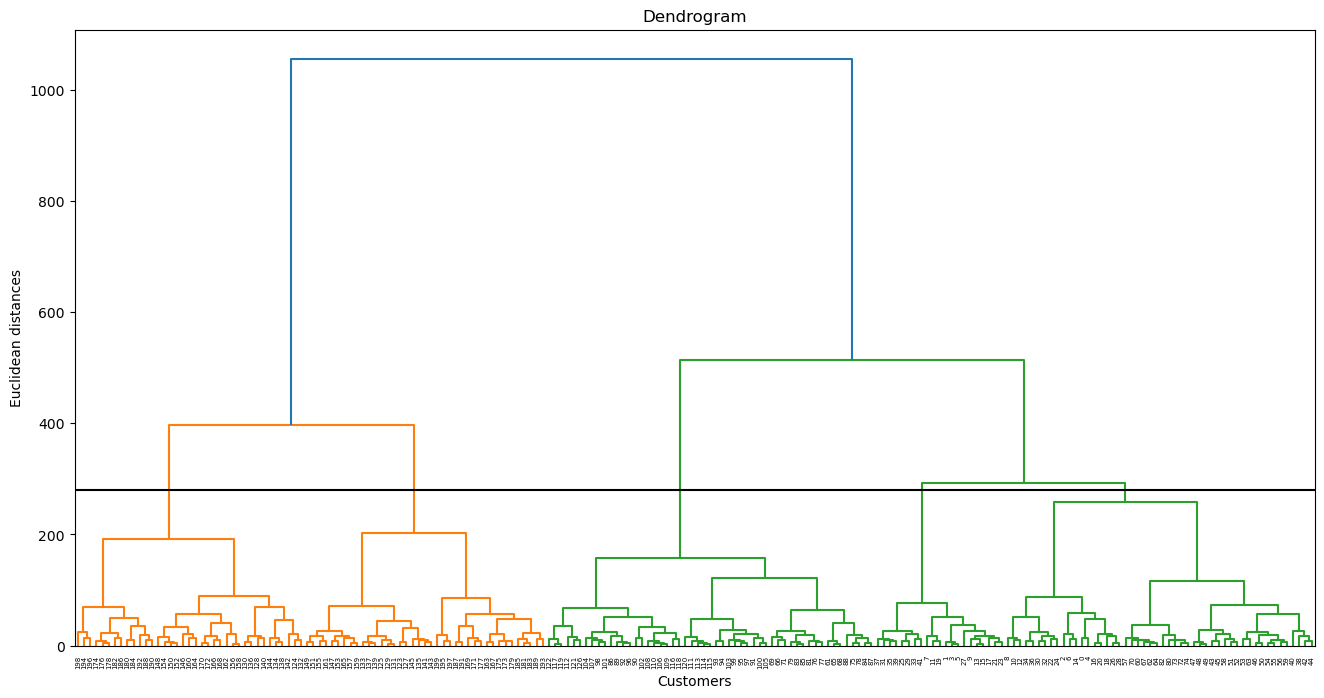

In [79]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.axhline(y=280, c='k') 
plt.show()

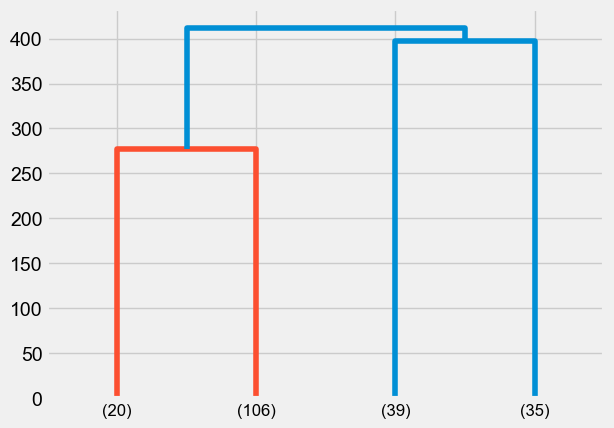

In [192]:
# method 1: 
from scipy.cluster import hierarchy

Z= sch.linkage(Xd, method  = "ward")

hierarchy.dendrogram(Z, truncate_mode = 'lastp', p=4 ) # -> you will have 4 leaf at the bottom of the plot
plt.show()
 


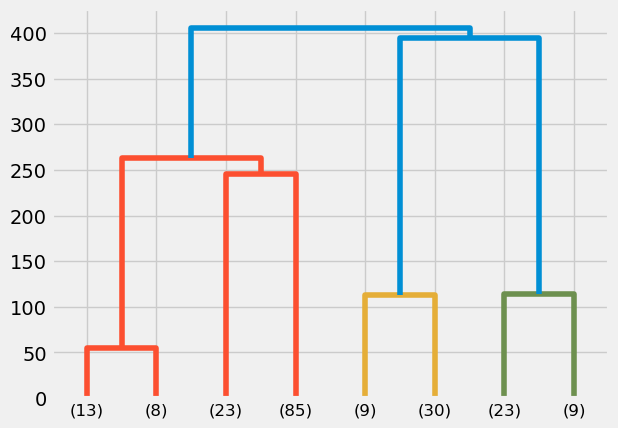

In [66]:
# method 2: level
hierarchy.dendrogram(Z, truncate_mode = 'level', p=2) # -> No more than ``p`` levels of the dendrogram 
                                                            #tree are displayed.
plt.show()

In [67]:
# how can i manipulate complete list of clusters in a dendrogram 
from scipy.cluster.hierarchy import fcluster
fl = fcluster(Z,5,criterion='maxclust')
fl


array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 5, 4, 5, 4,
       3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 3, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int32)

In [68]:
len(fl)

200

# Basic Radial Dendrogram

In [75]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import matplotlib.cm as cm
from matplotlib.axes import Axes
import matplotlib
from matplotlib.lines import Line2D

# import seaborn as sns
# sns.set_theme()


colormap_list = [
    "nipy_spectral",
    "terrain",
    "gist_rainbow",
    "CMRmap",
    "coolwarm",
    "gnuplot",
    "gist_stern",
    "brg",
    "rainbow",
]


def radialTreee(
    Z2,
    fontsize=5,
    ax: Axes = None,
    pallete="gist_rainbow",
    addlabels=True,
    sample_classes=None,
    colorlabels=None,
    colorlabels_legend=None,
):

    if ax is None:
        ax: Axes = plt.gca()
    linewidth = 0.5
    R = 1
    width = R * 0.1
    space = R * 0.05

    if colorlabels != None:
        offset = (
            width * len(colorlabels) / R + space * (len(colorlabels) - 1) / R + 0.05
        )
        print(offset)
    elif sample_classes != None:
        offset = (
            width * len(sample_classes) / R
            + space * (len(sample_classes) - 1) / R
            + 0.05
        )
        print(offset)
    else:

        offset = 0

    xmax = np.amax(Z2["icoord"])
    xmin = np.amin(Z2["icoord"])
    ymax = np.amax(Z2["dcoord"])
    ucolors = sorted(set(Z2["color_list"]))
    cmp = cm.get_cmap(pallete, len(ucolors))
    if type(cmp) == matplotlib.colors.LinearSegmentedColormap:
        cmap = cmp(np.linspace(0, 1, len(ucolors)))
    else:
        cmap = cmp.colors

    nlabels = 0
    for icoord, dcoord, c in sorted(zip(Z2["icoord"], Z2["dcoord"], Z2["color_list"])):
        _color = cmap[ucolors.index(c)]
        if c == "C0":  # np.abs(_xr1)<0.000000001 and np.abs(_yr1) <0.000000001:
            _color = "black"

        # transforming original x coordinates into relative circumference positions and y into radius
        # the rightmost leaf is going to [1, 0]
        r = R * (1 - np.array(dcoord) / ymax)
        _x = np.cos(
            2 * np.pi * np.array([icoord[0], icoord[2]]) / xmax
        )  # transforming original x coordinates into x circumference positions
        _xr0 = _x[0] * r[0]
        _xr1 = _x[0] * r[1]
        _xr2 = _x[1] * r[2]
        _xr3 = _x[1] * r[3]
        _y = np.sin(
            2 * np.pi * np.array([icoord[0], icoord[2]]) / xmax
        )  # transforming original x coordinates into y circumference positions
        _yr0 = _y[0] * r[0]
        _yr1 = _y[0] * r[1]
        _yr2 = _y[1] * r[2]
        _yr3 = _y[1] * r[3]
        # ax.scatter([_xr0, _xr1, _xr2, _xr3],[_yr0, _yr1, _yr2,_yr3], c="b")

        # if y[0]>0 and y[3]>0:
        # _color="black"
        # plotting radial lines
        ax.plot([_xr0, _xr1], [_yr0, _yr1], c=_color, linewidth=linewidth)
        ax.plot([_xr2, _xr3], [_yr2, _yr3], c=_color, linewidth=linewidth)

        # plotting circular links between nodes
        if _yr1 > 0 and _yr2 > 0:
            link = np.sqrt(r[1] ** 2 - np.linspace(_xr1, _xr2, 100) ** 2)
            ax.plot(np.linspace(_xr1, _xr2, 100), link, c=_color, linewidth=linewidth)
        elif _yr1 < 0 and _yr2 < 0:
            link = -np.sqrt(r[1] ** 2 - np.linspace(_xr1, _xr2, 100) ** 2)

            ax.plot(np.linspace(_xr1, _xr2, 100), link, c=_color, linewidth=linewidth)
        elif _yr1 > 0 and _yr2 < 0:
            _r = r[1]
            if _xr1 < 0 or _xr2 < 0:
                _r = -_r
            link = np.sqrt(r[1] ** 2 - np.linspace(_xr1, _r, 100) ** 2)
            ax.plot(np.linspace(_xr1, _r, 100), link, c=_color, linewidth=linewidth)
            link = -np.sqrt(r[1] ** 2 - np.linspace(_r, _xr2, 100) ** 2)
            ax.plot(np.linspace(_r, _xr2, 100), link, c=_color, linewidth=linewidth)

    label_coords = []
    # determine the coordiante of the labels and their rotation:
    for i, label in enumerate(Z2["ivl"]):
        # scipy (1.x.x) places the leaves in x = 5+i*10 , and we can use this
        # to calulate where to put the labels
        place = (5.0 + i * 10.0) / xmax * 2
        label_coords.append(
            [
                np.cos(place * np.pi) * (1.05 + offset),  # _x
                np.sin(place * np.pi) * (1.05 + offset),  # _y
                place * 180,  # _rot
            ]
        )
    if addlabels == True:
        assert len(Z2["ivl"]) == len(label_coords), (
            f'Internal error, label numbers for Z2 ({len(Z2["ivl"])})'
            f" and for calculated labels ({len(label_coords)}) must be equal!"
        )
        for (_x, _y, _rot), label in zip(label_coords, Z2["ivl"]):
            ax.text(
                _x,
                _y,
                label,
                {"va": "center"},
                rotation_mode="anchor",
                rotation=_rot,
                fontsize=fontsize,
            )

    if colorlabels != None:
        assert len(Z2["ivl"]) == len(label_coords), (
            "Internal error, label numbers "
            + str(len(Z2["ivl"]))
            + " and "
            + str(len(label_coords))
            + " must be equal!"
        )

        j = 0
        outerrad = R * 1.05 + width * len(colorlabels) + space * (len(colorlabels) - 1)

        print(outerrad)
        # sort_index=np.argsort(Z2['icoord'])
        # print(sort_index)
        intervals = []
        for i in range(len(label_coords)):
            _xl, _yl, _rotl = label_coords[i - 1]
            _x, _y, _rot = label_coords[i]
            if i == len(label_coords) - 1:
                _xr, _yr, _rotr = label_coords[0]
            else:
                _xr, _yr, _rotr = label_coords[i + 1]
            d = ((_xr - _xl) ** 2 + (_yr - _yl) ** 2) ** 0.5
            intervals.append(d)
        colorpos = intervals  # np.ones([len(label_coords)])
        labelnames = []
        for labelname, colorlist in colorlabels.items():

            colorlist = np.array(colorlist)[Z2["leaves"]]
            outerrad = outerrad - width * j - space * j
            innerrad = outerrad - width
            patches, texts = ax.pie(
                colorpos,
                colors=colorlist,
                radius=outerrad,
                counterclock=True,
                startangle=label_coords[0][2] * 0.5,
                wedgeprops=dict(
                    width=width,
                    # edgecolor='w', #if this is active the wedges will be more clearly separated
                ),
            )


            labelnames.append(labelname)
            j += 1

        if colorlabels_legend != None:
            for i, labelname in enumerate(labelnames):
                print(colorlabels_legend[labelname]["colors"])
                colorlines = []
                for c in colorlabels_legend[labelname]["colors"]:
                    colorlines.append(Line2D([0], [0], color=c, lw=4))

                leg = ax.legend(
                    colorlines,
                    colorlabels_legend[labelname]["labels"],
                    bbox_to_anchor=(1.5 + 0.3 * i, 1.0),
                    title=labelname,
                )
                ax.add_artist(leg)
    elif sample_classes != None:
        assert len(Z2["ivl"]) == len(label_coords), (
            "Internal error, label numbers "
            + str(len(Z2["ivl"]))
            + " and "
            + str(len(label_coords))
            + " must be equal!"
        )

        j = 0
        outerrad = (
            R * 1.05 + width * len(sample_classes) + space * (len(sample_classes) - 1)
        )

        print(outerrad)
        # sort_index=np.argsort(Z2['icoord'])
        # print(sort_index)
        intervals = []
        for i in range(len(label_coords)):
            _xl, _yl, _rotl = label_coords[i - 1]
            _x, _y, _rot = label_coords[i]
            if i == len(label_coords) - 1:
                _xr, _yr, _rotr = label_coords[0]
            else:
                _xr, _yr, _rotr = label_coords[i + 1]
            d = ((_xr - _xl) ** 2 + (_yr - _yl) ** 2) ** 0.5
            intervals.append(d)
        colorpos = intervals  # np.ones([len(label_coords)])
        labelnames = []
        colorlabels_legend = {}
        for labelname, colorlist in sample_classes.items():

            ucolors = sorted(list(np.unique(colorlist)))
            type_num = len(ucolors)
            _cmp = cm.get_cmap(colormap_list[j], type_num)
            _colorlist = [_cmp(ucolors.index(c)) for c in colorlist]
            _colorlist = np.array(_colorlist)[Z2["leaves"]]
            outerrad = outerrad - width * j - space * j
            innerrad = outerrad - width
            patches, texts = ax.pie(
                colorpos,
                colors=_colorlist,
                radius=outerrad,
                counterclock=True,
                startangle=label_coords[0][2] * 0.5,
                wedgeprops=dict(
                    width=width,
                    # edgecolor='w', #if this is active the wedges will be more clearly separated
                ),
            )


            labelnames.append(labelname)
            colorlabels_legend[labelname] = {}
            colorlabels_legend[labelname]["colors"] = _cmp(np.linspace(0, 1, type_num))
            colorlabels_legend[labelname]["labels"] = ucolors
            j += 1

        if colorlabels_legend != None:
            for i, labelname in enumerate(labelnames):
                print(colorlabels_legend[labelname]["colors"])
                colorlines = []
                for c in colorlabels_legend[labelname]["colors"]:
                    colorlines.append(Line2D([0], [0], color=c, lw=4))
                leg = ax.legend(
                    colorlines,
                    colorlabels_legend[labelname]["labels"],
                    bbox_to_anchor=(1.5 + 0.3 * i, 1.0),
                    title=labelname,
                )
                ax.add_artist(leg)
            # break
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    if colorlabels != None:
        maxr = R * 1.05 + width * len(colorlabels) + space * (len(colorlabels) - 1)
    elif sample_classes != None:
        maxr = (
            R * 1.05 + width * len(sample_classes) + space * (len(sample_classes) - 1)
        )
    else:
        maxr = R * 1.05
    ax.set_xlim(-maxr, maxr)
    ax.set_ylim(-maxr, maxr)
    return ax


def plot(
    Z2,
    fontsize=8,
    figsize=None,
    pallete="gist_rainbow",
    addlabels=True,
    show=True,
    sample_classes=None,
    colorlabels=None,
    colorlabels_legend=None,
):

    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.sans-serif"] = ["Arial"]
    plt.rcParams["svg.fonttype"] = "none"

    if figsize == None and colorlabels != None:
        figsize = [10, 5]
    elif figsize == None and sample_classes != None:
        figsize = [10, 5]
    elif figsize == None:
        figsize = [5, 5]
    fig, ax = plt.subplots(figsize=figsize)
    ax = radialTreee(
        Z2,
        fontsize=fontsize,
        ax=ax,
        pallete=pallete,
        addlabels=addlabels,
        sample_classes=sample_classes,
        colorlabels=colorlabels,
        colorlabels_legend=colorlabels_legend,
    )

    if show == True:
        fig.show()
    else:
        return ax


def mat_plot(mat):
    # Take a matrix data instead of a dendrogram data, calculate dendrogram and draw a circular dendrogram
    pass


def pandas_plot(df):

    pass


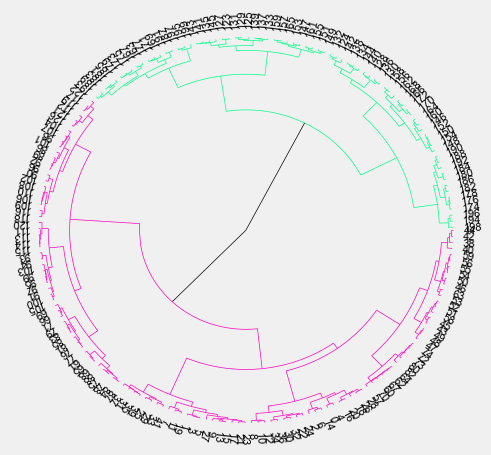

<Figure size 640x480 with 0 Axes>

In [194]:

if __name__ == "__main__":
    # Generate random features and distance matrix.

    test = [0, 1, 2, 3]
    np.random.seed(1)
    numleaf = len(df1)
#     _alphabets = [chr(i) for i in range(97, 97 + 24)]
#     labels = sorted(
#         ["".join(list(np.random.choice(_alphabets, 10))) for i in range(numleaf)]
#     )

    x = np.random.rand(numleaf)
    D = np.zeros([numleaf, numleaf])
    for i in range(numleaf):
        for j in range(numleaf):

            D[i, j] = abs(x[i] - x[j])
    Y = sch.linkage(df, method="ward")
    Z2 = sch.dendrogram(Y, no_plot=True)
    
    plot(Z2, show=True)
    
    plt.show()

#     if 0 in test:
       
#     plt.show()
    plt.savefig('Basic_radial.png')

In [ ]:

# # Dentogram with heatmap
# from scipy.cluster.hierarchy import linkage
# from scipy.cluster.hierarchy import dendrogram
# from scipy.spatial.distance import pdist
# import matplotlib
# from matplotlib import pyplot as plt
# import numpy as np
# from numpy import arange

# # Create the figure and set it's size.
# fig = plt.figure(figsize=(5,7))

# # Create the first subplot in the figure. 
# ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan= 1, colspan=1)

# # Set to your favorite colormap.
# cm = matplotlib.cm.viridis

# # Create array of random numbers.
# X = np.random.random([6,300])

# # Create a linkage object.
# linkmat = linkage(X)

# # Make a dendrogram from the linkage object.
# dendrogram(linkmat)

# # Use the x and y limits to set the aspect.
# x0,x1 = ax1.get_xlim()
# y0,y1 = ax1.get_ylim()
# #ax1.set_aspect((x1-x0)/(y1-y0))


# # Remove the ticks on the x-axis. 
# plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

# # Create the second subplot.
# ax2 = plt.subplot2grid((3, 1), (1, 0), rowspan= 2, colspan=1)

# labels = ["a", "b", "c", "d", "e"]

# plt.xticks(arange(0.5, 7.5, 1))

# plt.gca().set_xticklabels(labels)

# plt.pcolor(X.T)

# x0,x1 = ax2.get_xlim()
# y0,y1 = ax2.get_ylim()

# #ax2.set_aspect((x1-x0)/(y1-y0))

# # Insert the color scale
# plt.colorbar()
# cb = plt.colorbar(ax=ax1)
# cb.ax.set_visible(False)

# # Make the vertical distance between plots equal to zero 
# plt.subplots_adjust(hspace=0)